In [37]:
import networkx as nx

In [38]:
node_list = list(range(1, 54))
G = nx.Graph()
G.add_nodes_from(node_list)
G.number_of_nodes()

53

In [39]:
edge_list = [(1, 2), (1, 4), (1, 5), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (5, 9), (6, 9), (7, 8), (7, 9), (7, 10), (8, 10), (8, 11),
             (8, 15), (9, 10), (9, 12), (10, 11), (10, 12), (11, 12), (11, 14), (11, 15), (12, 13), (12, 14), (13, 14), (13, 15),
             (14, 15), (15, 16), (15, 17), (15, 18), (15, 40), (15, 41), (15, 42), (16, 17), (16, 19), (16, 20), (17, 18), (17, 20),
             (18, 20), (18, 22), (19, 20), (19, 21), (20, 21), (20, 22), (21, 28), (21, 36), (21, 39), (22, 23), (22, 27), (23, 24), 
             (23, 26), (23, 27), (24, 25), (24, 26), (25, 26), (25, 27), (26, 27), (28, 29), (28, 30), (29, 30), (29, 33), (29, 34),
             (30, 31), (30, 34), (31, 32), (31, 34), (32, 33), (32, 34), (33, 34), (35, 36), (35, 37), (35, 38), (36, 37), (36, 39), 
             (37, 38), (37, 39), (38, 39), (40, 41), (40, 42), (40, 43), (40, 44), (41, 42), (42, 43), (42, 52), (42, 53), (43, 44),
             (43, 51), (43, 52), (44, 45), (44, 47), (44, 48), (44, 49), (44, 50), (44, 51), (45, 46), (45, 47), (46, 47), (46, 48), 
             (47, 48), (49, 50), (51, 52), (52, 53)]

In [40]:
G.add_edges_from(edge_list)

In [41]:
rdd_edge_list = sc.parallelize(edge_list)

In [42]:
rdd_edge_weight_list = rdd_edge_list.map(lambda n: (n[0], n[1], 1 / (G.degree(n[0]) * G.degree(n[1]))))

In [47]:
rdd_edge_weight_list.collect()

[(1, 2, 0.1111111111111111),
 (1, 4, 0.08333333333333333),
 (1, 5, 0.08333333333333333),
 (2, 3, 0.1111111111111111),
 (2, 4, 0.08333333333333333),
 (3, 4, 0.08333333333333333),
 (3, 5, 0.08333333333333333),
 (4, 5, 0.0625),
 (5, 9, 0.05),
 (6, 9, 0.2),
 (7, 8, 0.08333333333333333),
 (7, 9, 0.06666666666666667),
 (7, 10, 0.06666666666666667),
 (8, 10, 0.05),
 (8, 11, 0.05),
 (8, 15, 0.025),
 (9, 10, 0.04),
 (9, 12, 0.04),
 (10, 11, 0.04),
 (10, 12, 0.04),
 (11, 12, 0.04),
 (11, 14, 0.05),
 (11, 15, 0.02),
 (12, 13, 0.06666666666666667),
 (12, 14, 0.05),
 (13, 14, 0.08333333333333333),
 (13, 15, 0.03333333333333333),
 (14, 15, 0.025),
 (15, 16, 0.025),
 (15, 17, 0.025),
 (15, 18, 0.025),
 (15, 40, 0.02),
 (15, 41, 0.03333333333333333),
 (15, 42, 0.016666666666666666),
 (16, 17, 0.0625),
 (16, 19, 0.08333333333333333),
 (16, 20, 0.041666666666666664),
 (17, 18, 0.0625),
 (17, 20, 0.041666666666666664),
 (18, 20, 0.041666666666666664),
 (18, 22, 0.0625),
 (19, 20, 0.05555555555555555),
 (

In [44]:
G.add_weighted_edges_from(rdd_edge_weight_list.collect())

In [59]:
from collections import defaultdict 
  
#Class to represent a graph 
class Graph : 
  
    def __init__(self, vertices) : 
        self.V = vertices # No. of vertices 
        self.graph = [] # default dictionary to store graph 
          
   
    # function to add an edge to graph 
    def addEdge(self, u, v, w) : 
        self.graph.append([u, v, w]) 
  
    # A utility function to find set of an element i 
    # (uses path compression technique) 
    def find(self, parent, i) : 
        if parent[i] == i : 
            return i 
        return self.find(parent, parent[i]) 
  
    # A function that does union of two sets of x and y 
    # (uses union by rank) 
    def union(self, parent, rank, x, y) : 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
  
        # Attach smaller rank tree under root of high rank tree 
        # (Union by Rank) 
        if rank[xroot] < rank[yroot] : 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot] : 
            parent[yroot] = xroot 
        #If ranks are same, then make one as root and increment 
        # its rank by one 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1
  
    # The main function to construct MST using Kruskal's algorithm 
    def boruvkaMST(self) : 
        e_w_list = []
        parent = []; rank = [];  
  
        # An array to store index of the cheapest edge of 
        # subset. It store [u,v,w] for each component 
        cheapest = [] 
  
        # Initially there are V different trees. 
        # Finally there will be one tree that will be MST 
        numTrees = self.V 
        MSTweight = 0
  
        # Create V subsets with single elements 
        for node in range(self.V) : 
            parent.append(node) 
            rank.append(0) 
            cheapest = [-1] * self.V 
      
        # Keep combining components (or sets) until all 
        # compnentes are not combined into single MST 
  
        while numTrees > 1 : 
  
            # Traverse through all edges and update 
               # cheapest of every component 
            for i in range(len(self.graph)) : 
  
                # Find components (or sets) of two corners 
                # of current edge 
                u, v, w = self.graph[i] 
                set1 = self.find(parent, u) 
                set2 = self.find(parent, v) 
  
                # If two corners of current edge belong to 
                # same set, ignore current edge. Else check if  
                # current edge is closer to previous 
                # cheapest edges of set1 and set2 
                if set1 != set2 :      
                      
                    if cheapest[set1] == -1 or cheapest[set1][2] > w : 
                        cheapest[set1] = [u, v, w]  
  
                    if cheapest[set2] == -1 or cheapest[set2][2] > w : 
                        cheapest[set2] = [u, v, w] 
  
            # Consider the above picked cheapest edges and add them 
            # to MST 
            for node in range(self.V) : 
  
                #Check if cheapest for current set exists 
                if cheapest[node] != -1 : 
                    u, v, w = cheapest[node] 
                    set1 = self.find(parent, u) 
                    set2 = self.find(parent, v) 
  
                    if set1 != set2 : 
                        MSTweight += w 
                        self.union(parent, rank, set1, set2) 
                        e_w_list.append((u + 1, v + 1, w))
                        #print("Edge %d-%d with weight %d included in MST" % (u, v, w)) 
                        numTrees = numTrees - 1
              
            #reset cheapest array 
            cheapest = [-1] * self.V 
  
        return e_w_list 
        print("Weight of MST is %d" % MSTweight)

In [50]:
rdd_edge_weight_list2 = rdd_edge_weight_list.map(lambda n: (n[0] - 1, n[1] - 1, n[2]))

In [ ]:
rdd_edge_weight_list2.collect()

In [62]:
g = Graph(53) 
for i in rdd_edge_weight_list2.collect() :
    g.addEdge(i[0] , i[1], i[2]) 
e_w_list = g.boruvkaMST() 

In [63]:
print(e_w_list)

[(1, 4, 0.08333333333333333), (2, 4, 0.08333333333333333), (3, 4, 0.08333333333333333), (4, 5, 0.0625), (5, 9, 0.05), (6, 9, 0.2), (7, 9, 0.06666666666666667), (8, 15, 0.025), (9, 10, 0.04), (11, 15, 0.02), (9, 12, 0.04), (13, 15, 0.03333333333333333), (14, 15, 0.025), (15, 42, 0.016666666666666666), (15, 16, 0.025), (15, 17, 0.025), (15, 18, 0.025), (19, 20, 0.05555555555555555), (20, 21, 0.03333333333333333), (20, 22, 0.041666666666666664), (22, 23, 0.0625), (23, 24, 0.08333333333333333), (25, 26, 0.08333333333333333), (23, 26, 0.0625), (22, 27, 0.0625), (21, 28, 0.06666666666666667), (29, 34, 0.05), (30, 34, 0.05), (31, 34, 0.06666666666666667), (32, 34, 0.06666666666666667), (33, 34, 0.06666666666666667), (35, 36, 0.08333333333333333), (21, 36, 0.05), (36, 37, 0.0625), (37, 38, 0.08333333333333333), (21, 39, 0.05), (15, 40, 0.02), (15, 41, 0.03333333333333333), (43, 44, 0.025), (40, 44, 0.025), (44, 45, 0.041666666666666664), (46, 47, 0.08333333333333333), (44, 47, 0.03125), (44, 4

In [64]:
G_mst = nx.Graph()
G_mst.add_weighted_edges_from(e_w_list)
G_mst.number_of_nodes()

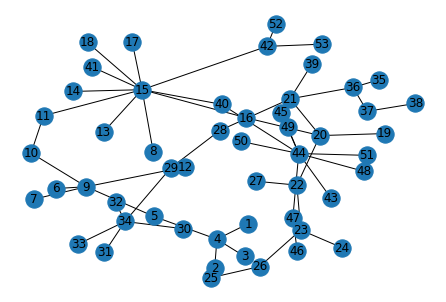

In [66]:
nx.draw(G_mst, with_labels = True)